<a href="https://colab.research.google.com/github/RaulRMO10/Desafio_5_Prepare_seu_dataset_para_modelagem_de_dados/blob/main/Desafio_5_DNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio 5: Prepare seu dataset para modelagem de dados

In [ ]:
!pip install ydata_profiling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling
from sklearn.preprocessing import scale

# Etapa 01 Leia o arquivo e inspecione os dados


In [ ]:
df = pd.read_csv('Data.csv')

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611121,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Etapa 02) Valores faltantes na identificação do cliente

In [ ]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df_clean = df.dropna()

# Etapa 03) Preços unitários e quantidade de produtos iguais ou inferior a 0

In [ ]:
df_clean = df_clean[~(df_clean['UnitPrice'] <= 0)]

In [ ]:
df_clean = df_clean[~(df_clean['Quantity'] <= 0)]

In [ ]:
df_clean.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
(df_clean['UnitPrice'] <= 0).any()

False

In [ ]:
(df_clean['Quantity'] <= 0).any()

False

#Etapa 04) Verifique se existem linhas duplicadas

In [ ]:
[df_clean.duplicated(keep=False)]

[0         False
 1         False
 2         False
 3         False
 4         False
           ...  
 541904    False
 541905    False
 541906    False
 541907    False
 541908    False
 Length: 397884, dtype: bool]

In [ ]:
df_clean = df_clean.drop_duplicates()
df_clean

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df_clean.duplicated().any()

False

#Etapa 05) Tipos de dados da coluna


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


In [ ]:
df_clean['CustomerID'] = df_clean['CustomerID'].astype('int64')

In [ ]:
df_clean['InvoiceDate'] =df_clean['InvoiceDate'].astype('datetime64[ns]')

#Etapa 06) Tratando os outliers

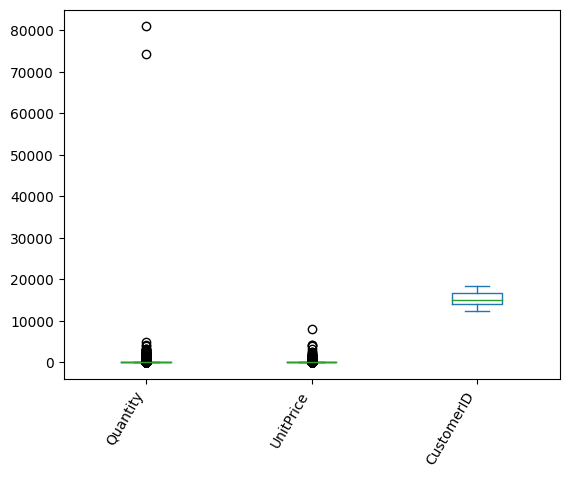

In [ ]:
df_clean.plot.box()
plt.xticks(rotation = 60, ha='right');

In [ ]:
outliers_Quantity = df_clean.nlargest(10, 'Quantity')
print(outliers_Quantity)

       InvoiceNo StockCode                          Description  Quantity  \
540421    581483     23843          PAPER CRAFT , LITTLE BIRDIE     80995   
61619     541431     23166       MEDIUM CERAMIC TOP STORAGE JAR     74215   
421632    573008     84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS      4800   
206121    554868     22197                 SMALL POPCORN HOLDER      4300   
97432     544612     22053                EMPIRE DESIGN ROSETTE      3906   
270885    560599     18007  ESSENTIAL BALM 3.5g TIN IN ENVELOPE      3186   
52711     540815     21108   FAIRY CAKE FLANNEL ASSORTED COLOUR      3114   
160546    550461     21108   FAIRY CAKE FLANNEL ASSORTED COLOUR      3114   
433788    573995     16014          SMALL CHINESE STYLE SCISSOR      3000   
4945      536830     84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS      2880   

               InvoiceDate  UnitPrice  CustomerID         Country  
540421 2011-12-09 09:15:00       2.08       16446  United Kingdom  
61619  2011-01-1

In [ ]:
outliers_UnitPrice = df_clean.nlargest(10, 'UnitPrice')
print(outliers_UnitPrice)

       InvoiceNo StockCode Description  Quantity         InvoiceDate  \
173382    551697      POST     POSTAGE         1 2011-05-03 13:46:00   
422351    573077         M      Manual         1 2011-10-27 14:13:00   
422376    573080         M      Manual         1 2011-10-27 14:20:00   
406406    571751         M      Manual         1 2011-10-19 11:18:00   
374542    569382         M      Manual         1 2011-10-03 16:44:00   
297438    562946         M      Manual         1 2011-08-11 09:38:00   
144826    548813         M      Manual         1 2011-04-04 13:03:00   
406407    571751         M      Manual         1 2011-10-19 11:18:00   
144829    548820         M      Manual         1 2011-04-04 13:04:00   
343000    566927         M      Manual         1 2011-09-15 15:20:00   

        UnitPrice  CustomerID         Country  
173382    8142.75       16029  United Kingdom  
422351    4161.06       12536          France  
422376    4161.06       12536          France  
406406    3949.

In [ ]:
indices_para_remover = [540421, 61619, 173382]
df_clean = df_clean.drop(indices_para_remover)

print(df_clean)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899          CHILDREN'S APRON DOLLY GIRL         6   
541906    581587     23254         CHILDRENS CUTLERY DOLLY GIRL         4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138         BAKING SET 9 PIECE RETROSPOT         3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      

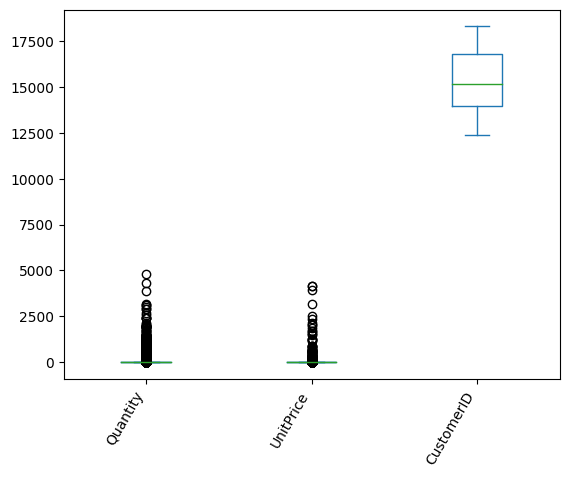

In [ ]:
df_clean.plot.box()
plt.xticks(rotation = 60, ha='right');

#Etapa 07) Crie uma coluna adicional

In [ ]:
df_clean['Total_Price'] = df_clean['Quantity'] * df_clean['UnitPrice']
df_clean

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#Etapa 08) Última data


In [ ]:
Data_Ultima_Compra = df_clean['InvoiceDate'].max()
print(Data_Ultima_Compra)

2011-12-09 12:50:00


#Etapa 09) Plotando gráficos

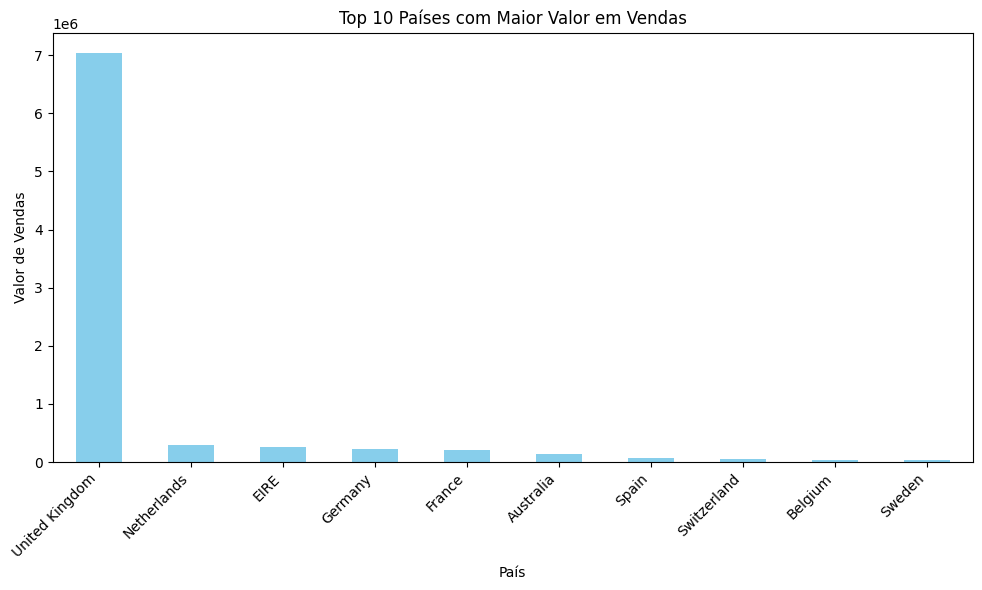

In [ ]:
vendas_por_pais = df_clean.groupby('Country')['Total_Price'].sum()

# Ordenar em ordem decrescente e pegar os top 10
top_10_paises_vendas = vendas_por_pais.nlargest(10)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
top_10_paises_vendas.plot(kind='bar', color='skyblue')
plt.title('Top 10 Países com Maior Valor em Vendas')
plt.xlabel('País')
plt.ylabel('Valor de Vendas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

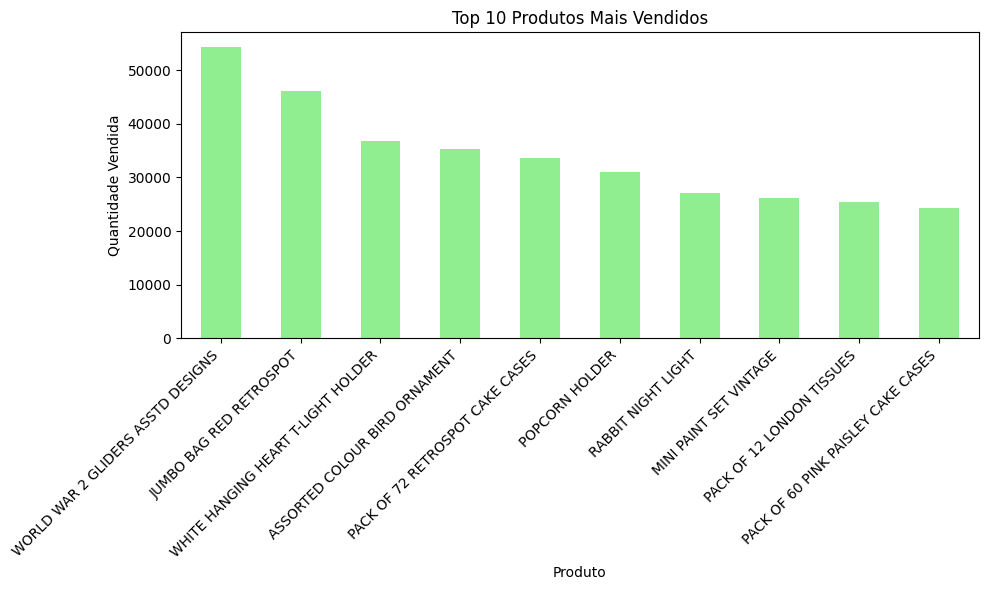

In [ ]:
# Agrupar por descrição do produto e somar a quantidade vendida
produtos_mais_vendidos = df_clean.groupby('Description')['Quantity'].sum()

# Ordenar em ordem decrescente e pegar os top 10
top_10_produtos_vendidos = produtos_mais_vendidos.nlargest(10)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
top_10_produtos_vendidos.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

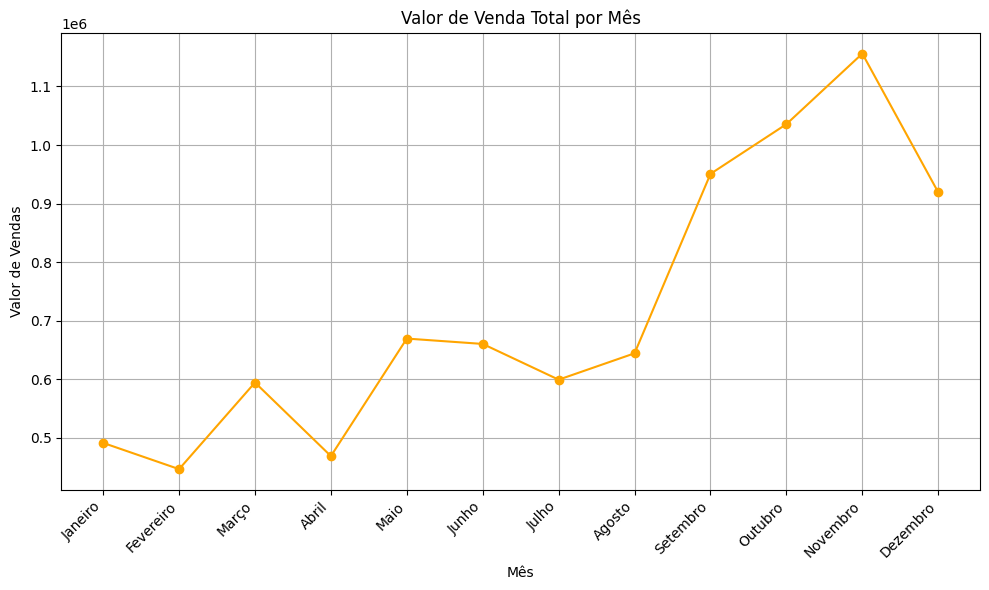

In [ ]:
meses_do_ano = [
    'Janeiro', 'Fevereiro', 'Março', 'Abril',
    'Maio', 'Junho', 'Julho', 'Agosto',
    'Setembro', 'Outubro', 'Novembro', 'Dezembro'
]
# Extrair o mês da data de venda
df_clean['Month'] = df_clean['InvoiceDate'].dt.month

# Agrupar por mês e somar o valor das vendas
vendas_por_mes = df_clean.groupby('Month')['Total_Price'].sum()

# Plotar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(vendas_por_mes.index, vendas_por_mes.values, marker='o', color='orange', linestyle='-')
plt.title('Valor de Venda Total por Mês')
plt.xlabel('Mês')
plt.ylabel('Valor de Vendas')
plt.xticks(range(1, 13), meses_do_ano, rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

<ipython-input-216-acaea6d207dd>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_top_10_paises = df_clean[df['Country'].isin(top_10_paises)]


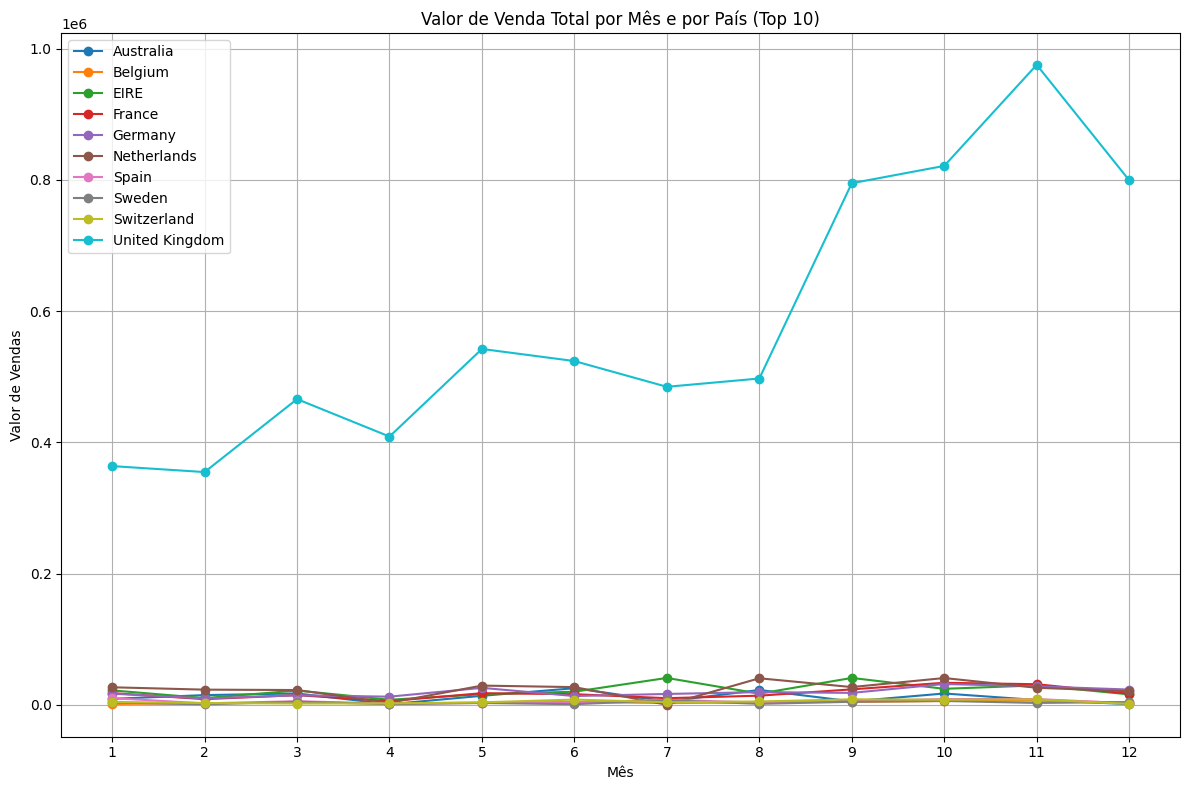

In [ ]:
# Filtrar DataFrame para incluir apenas os top 10 países com maior valor em vendas
top_10_paises = vendas_por_pais.nlargest(10).index
df_top_10_paises = df_clean[df['Country'].isin(top_10_paises)]

# Agrupar por mês e país, e somar o valor das vendas
vendas_por_mes_pais = df_top_10_paises.groupby(['Month', 'Country'])['Total_Price'].sum().unstack()

# Plotar o gráfico de linhas para cada país
plt.figure(figsize=(12, 8))
for country in vendas_por_mes_pais.columns:
    plt.plot(vendas_por_mes_pais.index, vendas_por_mes_pais[country], marker='o', label=country)

plt.title('Valor de Venda Total por Mês e por País (Top 10)')
plt.xlabel('Mês')
plt.ylabel('Valor de Vendas')
plt.xticks(range(1, 13))
plt.legend(loc='best')
plt.tight_layout()
plt.grid(True)
plt.show()

#Etapa 10) Cálculo do RFM


In [ ]:
# Agrupar por Cliente e Pedido (InvoiceNo) e calcular o preço total do pedido
df_pedidos = df_clean.groupby(['CustomerID', 'InvoiceNo']).agg({
    'InvoiceDate': 'max',
    'Total_Price': 'sum'
}).reset_index()

print("Dados agrupados por Cliente e Pedido:")
print(df_pedidos)

Dados agrupados por Cliente e Pedido:
       CustomerID InvoiceNo         InvoiceDate  Total_Price
0           12347    537626 2010-12-07 14:57:00       711.79
1           12347    542237 2011-01-26 14:30:00       475.39
2           12347    549222 2011-04-07 10:43:00       636.25
3           12347    556201 2011-06-09 13:01:00       382.52
4           12347    562032 2011-08-02 08:48:00       584.91
...           ...       ...                 ...          ...
18524       18283    579673 2011-11-30 12:59:00       220.31
18525       18283    580872 2011-12-06 12:02:00       208.00
18526       18287    554065 2011-05-22 10:39:00       765.28
18527       18287    570715 2011-10-12 10:23:00      1001.32
18528       18287    573167 2011-10-28 09:29:00        70.68

[18529 rows x 4 columns]


In [ ]:
# Calcular a recência para cada cliente
df_pedidos['Recencia'] = (Data_Ultima_Compra - df_pedidos['InvoiceDate']).dt.days

print("\nDados com Recência calculada:")
print(df_pedidos)


Dados com Recência calculada:
       CustomerID InvoiceNo         InvoiceDate  Total_Price  Recencia
0           12347    537626 2010-12-07 14:57:00       711.79       366
1           12347    542237 2011-01-26 14:30:00       475.39       316
2           12347    549222 2011-04-07 10:43:00       636.25       246
3           12347    556201 2011-06-09 13:01:00       382.52       182
4           12347    562032 2011-08-02 08:48:00       584.91       129
...           ...       ...                 ...          ...       ...
18524       18283    579673 2011-11-30 12:59:00       220.31         8
18525       18283    580872 2011-12-06 12:02:00       208.00         3
18526       18287    554065 2011-05-22 10:39:00       765.28       201
18527       18287    570715 2011-10-12 10:23:00      1001.32        58
18528       18287    573167 2011-10-28 09:29:00        70.68        42

[18529 rows x 5 columns]


In [ ]:
frequencia = df_pedidos.groupby('CustomerID')['InvoiceNo'].count().reset_index()
frequencia.columns = ['CustomerID', 'Frequencia']

# Merge para adicionar a frequência ao DataFrame principal
df_rfm = pd.merge(df_pedidos, frequencia, on='CustomerID')

print("\nDados com Frequência calculada:")
print(df_rfm)


Dados com Frequência calculada:
       CustomerID InvoiceNo         InvoiceDate  Total_Price  Recencia  \
0           12347    537626 2010-12-07 14:57:00       711.79       366   
1           12347    542237 2011-01-26 14:30:00       475.39       316   
2           12347    549222 2011-04-07 10:43:00       636.25       246   
3           12347    556201 2011-06-09 13:01:00       382.52       182   
4           12347    562032 2011-08-02 08:48:00       584.91       129   
...           ...       ...                 ...          ...       ...   
18524       18283    579673 2011-11-30 12:59:00       220.31         8   
18525       18283    580872 2011-12-06 12:02:00       208.00         3   
18526       18287    554065 2011-05-22 10:39:00       765.28       201   
18527       18287    570715 2011-10-12 10:23:00      1001.32        58   
18528       18287    573167 2011-10-28 09:29:00        70.68        42   

       Frequencia  
0               7  
1               7  
2               7 

In [ ]:
# Calcular o ticket médio das compras para cada cliente
ticket_medio = df_pedidos.groupby('CustomerID')['Total_Price'].mean().reset_index()
ticket_medio.columns = ['CustomerID', 'Ticket_Medio']

# Merge para adicionar o ticket médio ao DataFrame principal
df_rfm = pd.merge(df_rfm, ticket_medio, on='CustomerID')

print("\nDados com RFM completo:")
print(df_rfm)


Dados com RFM completo:
       CustomerID InvoiceNo         InvoiceDate  Total_Price  Recencia  \
0           12347    537626 2010-12-07 14:57:00       711.79       366   
1           12347    542237 2011-01-26 14:30:00       475.39       316   
2           12347    549222 2011-04-07 10:43:00       636.25       246   
3           12347    556201 2011-06-09 13:01:00       382.52       182   
4           12347    562032 2011-08-02 08:48:00       584.91       129   
...           ...       ...                 ...          ...       ...   
18524       18283    579673 2011-11-30 12:59:00       220.31         8   
18525       18283    580872 2011-12-06 12:02:00       208.00         3   
18526       18287    554065 2011-05-22 10:39:00       765.28       201   
18527       18287    570715 2011-10-12 10:23:00      1001.32        58   
18528       18287    573167 2011-10-28 09:29:00        70.68        42   

       Frequencia  Ticket_Medio  
0               7    615.714286  
1               7 